In [ ]:
# import libraries
import numpy as np
import pandas as pd
import re
import semopy
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from semopy import Model, report
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pydot
from IPython.display import Image, display

# 6. 모델링- 구조방정식

In [3]:
# clean_done_df 불러오기
clean_done_df = pd.read_csv('data/clean_done_df.csv', encoding='EUC-KR', low_memory=False)

In [4]:
# codeuse 불러오기
codeuse = pd.read_csv('data/codeuse_2안.csv', encoding='utf-8', low_memory=False)

In [5]:
clean_done_df

,g191f020,g191f071,g191f072,g191f010,g191h001,g191i001,g191j001,g191m001,g191p035,g191f073074,...,g191d020_10.0,g191d020_11.0,g191d020_12.0,g191d020_13.0,g191d020_14.0,g191d020_15.0,g191d020_16.0,g191d020_17.0,Y191ear,g191a297
0,1.0,3.0,3.0,0.0,1,0.0,1,1,300.0,0.844444,...,False,False,False,False,False,False,False,False,GP19,0
1,0.0,5.0,3.0,0.0,1,0.0,0,1,200.0,0.888889,...,False,False,False,False,False,False,False,False,GP19,0
2,1.0,5.0,5.0,0.0,1,0.0,0,0,300.0,0.860000,...,False,False,False,False,False,False,True,False,GP19,0
3,1.0,4.0,4.0,0.0,1,0.0,0,1,1000.0,0.844444,...,False,False,False,False,False,False,False,False,GP19,1
4,1.0,3.0,3.0,0.0,0,0.0,0,1,300.0,0.888889,...,False,False,False,False,False,False,False,False,GP19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27673,0.0,4.0,3.0,0.0,1,0.0,0,1,200.0,0.711111,...,False,False,False,False,False,False,False,False,GP10,0
27674,0.0,4.0,3.0,0.0,1,0.0,0,1,500.0,0.666667,...,False,False,False,False,False,False,False,False,GP10,0
27675,0.0,4.0,2.0,0.0,1,0.0,1,0,100.0,0.866667,...,False,False,False,False,False,False,False,False,GP10,0
27676,0.0,4.0,3.0,0.0,0,0.0,0,1,200.0,0.888889,...,False,False,False,False,False,False,False,False,GP10,0


In [6]:
clean_done_df.columns

Index(['g191f020', 'g191f071', 'g191f072', 'g191f010', 'g191h001', 'g191i001',
       'g191j001', 'g191m001', 'g191p035', 'g191f073074', 'g191p001_1.0',
       'g191p001_3.0', 'g191p001_4.0', 'g191d052', 'g191d109', 'g191d108',
       'g191d112', 'g191d144', 'g191d145', 'g191d146', 'g191d245', 'g191j021',
       'g191k042', 'g191k053', 'g191k055', 'g191k043', 'g191k044', 'g191k045',
       'g191k046', 'g191k047', 'g191k048', 'g191k049', 'g191k050',
       'g191d249new', 'g191d116', 'g191d117', 'g191d119', 'g191d120',
       'g191d121', 'g191d122', 'g191d123', 'g191d124', 'g191d125', 'g191d126',
       'g191d130', 'g191d131', 'g191d132', 'g191d016', 'g191d017', 'g191d018',
       'g191d041', 'g191d042', 'g191d048', 'g191d049', 'g191d051', 'g191d106',
       'g191d152', 'g191d022_1.0', 'g191d022_2.0', 'g191d022_3.0',
       'g191d022_4.0', 'g191d022_5.0', 'g191d022_6.0', 'g191d022_7.0',
       'g191d022_8.0', 'g191d020_1.0', 'g191d020_2.0', 'g191d020_3.0',
       'g191d020_4.0', 'g191d02

In [7]:
clean_done_columns = [col.replace('.0', '').replace('_', 'choice').replace('-','minus') for col in clean_done_df.columns]
clean_done_columns

['g191f020',
 'g191f071',
 'g191f072',
 'g191f010',
 'g191h001',
 'g191i001',
 'g191j001',
 'g191m001',
 'g191p035',
 'g191f073074',
 'g191p001choice1',
 'g191p001choice3',
 'g191p001choice4',
 'g191d052',
 'g191d109',
 'g191d108',
 'g191d112',
 'g191d144',
 'g191d145',
 'g191d146',
 'g191d245',
 'g191j021',
 'g191k042',
 'g191k053',
 'g191k055',
 'g191k043',
 'g191k044',
 'g191k045',
 'g191k046',
 'g191k047',
 'g191k048',
 'g191k049',
 'g191k050',
 'g191d249new',
 'g191d116',
 'g191d117',
 'g191d119',
 'g191d120',
 'g191d121',
 'g191d122',
 'g191d123',
 'g191d124',
 'g191d125',
 'g191d126',
 'g191d130',
 'g191d131',
 'g191d132',
 'g191d016',
 'g191d017',
 'g191d018',
 'g191d041',
 'g191d042',
 'g191d048',
 'g191d049',
 'g191d051',
 'g191d106',
 'g191d152',
 'g191d022choice1',
 'g191d022choice2',
 'g191d022choice3',
 'g191d022choice4',
 'g191d022choice5',
 'g191d022choice6',
 'g191d022choice7',
 'g191d022choice8',
 'g191d020choice1',
 'g191d020choice2',
 'g191d020choice3',
 'g191d020ch

In [8]:
col_category_df = pd.DataFrame(columns=['이름','카테고리'])

# col_category_df 데이터프레임 생성
col_category_df = pd.DataFrame(columns=['이름', '카테고리'])

clean_done_columns_indpdnt = clean_done_columns[:-2]

for col_name in clean_done_columns_indpdnt:
    org_col_name = col_name[:8]
    category = codeuse['카테고리'][codeuse['이름'] == org_col_name].values[0]  # Series에서 값 추출
    col_category_df.loc[len(col_category_df)] = [col_name, category]  # 새로운 행 추가

In [9]:
for category, group in col_category_df.groupby('카테고리'):
    print("카테고리:", category)
    print("컬럼:", group['이름'].tolist())

카테고리: 개인환경
컬럼: ['g191f020', 'g191f071', 'g191f072', 'g191f010', 'g191h001', 'g191i001', 'g191j001', 'g191m001', 'g191p035', 'g191f073074', 'g191p001choice1', 'g191p001choice3', 'g191p001choice4']
카테고리: 만족도
컬럼: ['g191d116', 'g191d117', 'g191d119', 'g191d120', 'g191d121', 'g191d122', 'g191d123', 'g191d124', 'g191d125', 'g191d126', 'g191d130', 'g191d131', 'g191d132']
카테고리: 직장
컬럼: ['g191d016', 'g191d017', 'g191d018', 'g191d041', 'g191d042', 'g191d048', 'g191d049', 'g191d051', 'g191d106', 'g191d152', 'g191d022choice1', 'g191d022choice2', 'g191d022choice3', 'g191d022choice4', 'g191d022choice5', 'g191d022choice6', 'g191d022choice7', 'g191d022choice8', 'g191d020choice1', 'g191d020choice2', 'g191d020choice3', 'g191d020choice4', 'g191d020choice5', 'g191d020choice6', 'g191d020choice7', 'g191d020choice8', 'g191d020choice9', 'g191d020choice10', 'g191d020choice11', 'g191d020choice12', 'g191d020choice13', 'g191d020choice14', 'g191d020choice15', 'g191d020choice16', 'g191d020choice17']
카테고리: 직장개인특성
컬럼:

In [10]:
# 처리된 결과를 담을 문자열 초기화
processed_output = ""

# 결과값 딕셔너리
result_dict = {
    "개인환경": ['g191f020', 'g191f071', 'g191f072', 'g191f010', 'g191h001', 'g191i001', 'g191j001', 'g191m001', 'g191p035', 'g191f073074', 'g191p001choice1', 'g191p001choice3', 'g191p001choice4'],
    "만족도": ['g191d116', 'g191d117', 'g191d119', 'g191d120', 'g191d121', 'g191d122', 'g191d123', 'g191d124', 'g191d125', 'g191d126', 'g191d130', 'g191d131', 'g191d132'],
    "직장": ['g191d016', 'g191d017', 'g191d018', 'g191d041', 'g191d042', 'g191d048', 'g191d049', 'g191d051', 'g191d106', 'g191d152', 'g191d022choice1', 'g191d022choice2', 'g191d022choice3', 'g191d022choice4', 'g191d022choice5', 'g191d022choice6', 'g191d022choice7', 'g191d022choice8', 'g191d020choice1', 'g191d020choice2', 'g191d020choice3', 'g191d020choice4', 'g191d020choice5', 'g191d020choice6', 'g191d020choice7', 'g191d020choice8', 'g191d020choice9', 'g191d020choice10', 'g191d020choice11', 'g191d020choice12', 'g191d020choice13', 'g191d020choice14', 'g191d020choice15', 'g191d020choice16', 'g191d020choice17'],
    "직장개인특성": ['g191d052', 'g191d109', 'g191d108', 'g191d112', 'g191d144', 'g191d145', 'g191d146', 'g191d245', 'g191j021', 'g191k042', 'g191k053', 'g191k055', 'g191k043', 'g191k044', 'g191k045', 'g191k046', 'g191k047', 'g191k048', 'g191k049', 'g191k050', 'g191d249new']
}

# 결과값 처리 및 문자열에 추가
for category, columns in result_dict.items():
    processed_columns = " + ".join(columns)
    processed_output += f"카테고리: {category}\n컬럼: [{processed_columns}]\n"

# 처리된 결과 출력
print(processed_output)


카테고리: 개인환경
컬럼: [g191f020 + g191f071 + g191f072 + g191f010 + g191h001 + g191i001 + g191j001 + g191m001 + g191p035 + g191f073074 + g191p001choice1 + g191p001choice3 + g191p001choice4]
카테고리: 만족도
컬럼: [g191d116 + g191d117 + g191d119 + g191d120 + g191d121 + g191d122 + g191d123 + g191d124 + g191d125 + g191d126 + g191d130 + g191d131 + g191d132]
카테고리: 직장
컬럼: [g191d016 + g191d017 + g191d018 + g191d041 + g191d042 + g191d048 + g191d049 + g191d051 + g191d106 + g191d152 + g191d022choice1 + g191d022choice2 + g191d022choice3 + g191d022choice4 + g191d022choice5 + g191d022choice6 + g191d022choice7 + g191d022choice8 + g191d020choice1 + g191d020choice2 + g191d020choice3 + g191d020choice4 + g191d020choice5 + g191d020choice6 + g191d020choice7 + g191d020choice8 + g191d020choice9 + g191d020choice10 + g191d020choice11 + g191d020choice12 + g191d020choice13 + g191d020choice14 + g191d020choice15 + g191d020choice16 + g191d020choice17]
카테고리: 직장개인특성
컬럼: [g191d052 + g191d109 + g191d108 + g191d112 + g191d144 + g191d14

In [11]:
# 데이터프레임 컬럼명 변경
clean_done_df.columns = clean_done_columns

In [12]:
missing_values = clean_done_df.columns[clean_done_df.isnull().any()]
missing_values

Index([], dtype='object')

In [13]:
clean_done_df.columns[pd.isna(clean_done_df).any()]

Index([], dtype='object')

In [14]:
# 수치형이 아닌 값 수치형으로 변환
for col in clean_done_df.columns:
    if clean_done_df[col].dtype == 'object':
        clean_done_df[col] = clean_done_df[col].astype('category').cat.codes
    elif clean_done_df[col].dtype == 'category':
        clean_done_df[col] = clean_done_df[col].cat.codes
    elif clean_done_df[col].dtype == 'bool':
        clean_done_df[col] = clean_done_df[col].astype(int)

# 모든 컬럼이 숫자형인지 확인
# print(clean_done_df.dtypes)

# 연도 컬럼을 제외한 데이터 준비
clean_done_df = clean_done_df.drop('Y191ear', axis=1)

# 모델 정의
model_desc = '''
    # measurement model
    env_personal =~ g191f020 + g191f071 + g191f072 + g191f010 + g191h001 + g191i001 + g191j001 + g191m001 + g191p035 + g191f073074 + g191p001choice1 + g191p001choice3 + g191p001choice4
    satisfaction =~ g191d116 + g191d117 + g191d119 + g191d120 + g191d121 + g191d122 + g191d123 + g191d124 + g191d125 + g191d126 + g191d130 + g191d131 + g191d132
    job =~  g191d016 + g191d017 + g191d018 + g191d041 + g191d042 + g191d048 + g191d049 + g191d051 + g191d106 + g191d152 + g191d022choice1 + g191d022choice2 + g191d022choice3 + g191d022choice4 + g191d022choice5 + g191d022choice6 + g191d022choice7 + g191d022choice8 + g191d020choice1 + g191d020choice2 + g191d020choice3 + g191d020choice4 + g191d020choice5 + g191d020choice6 + g191d020choice7 + g191d020choice8 + g191d020choice9 + g191d020choice10 + g191d020choice11 + g191d020choice12 + g191d020choice13 + g191d020choice14 + g191d020choice15 + g191d020choice16 + g191d020choice17
    job_personal =~ g191d052 + g191d109 + g191d108 + g191d112 + g191d144 + g191d145 + g191d146 + g191d245 + g191j021 + g191k042 + g191k053 + g191k055 + g191k043 + g191k044 + g191k045 + g191k046 + g191k047 + g191k048 + g191k049 + g191k050 + g191d249new

    # structural model
    g191a297 ~ env_personal + satisfaction + job + job_personal
'''

# 모델 적합
model = Model(model_desc)
model.fit(clean_done_df)

# 결과 요약
estimates = model.inspect(std_est=True)
print(estimates)

                lval  op             rval      Estimate  Est. Std    Std. Err  \
0           g191f020   ~     env_personal      1.000000  0.042752           -   
1           g191f071   ~     env_personal     36.655086  0.875360    5.725412   
2           g191f072   ~     env_personal     29.787275  0.727158    4.633769   
3           g191f010   ~     env_personal      0.431150  0.043669    0.093719   
4           g191h001   ~     env_personal     -0.142969 -0.006264    0.153315   
..               ...  ..              ...           ...       ...         ...   
174         g191m001  ~~         g191m001      0.225088  0.998601    0.001914   
175  g191p001choice1  ~~  g191p001choice1      0.058688  0.997802    0.000499   
176  g191p001choice3  ~~  g191p001choice3      0.001118  0.999744     0.00001   
177  g191p001choice4  ~~  g191p001choice4      0.000614  0.999994    0.000005   
178         g191p035  ~~         g191p035  22943.325213  1.000000  195.031174   

        z-value   p-value  

In [ ]:
estimates.to_csv('data/sem_model_estimates.csv', index=False)

In [ ]:
estimates

## 6-1. 모델링- 구조방정식 시각화

[구조방정식 해석](https://blog.naver.com/gracestock_1/120200806864)

In [ ]:
# indicator vaility
def factorloadings(Esti):
  Est= Esti[Esti['op']=='~'].iloc[3:,:]
  # print(Est)
  Est1 = Est.loc[:,['lval','rval','Est. Std', 'p-value']]
  Est1['sig']= np.where(Est1['Est. Std']> 0.7,"Good",
                        np.where(Est1['Est. Std']> 0.5,"Fair","ns"))
  # print("Fator Loadings Validity \n All Est. Std should be at least 0.5 \n \n", Est1)
  # print(Est[['lval','rval','Est. Std']])
  return Est1

# 지표 타당도
# [출처] 구조방정식(SEM:Structure Equation Modeling) semopy용 CFA function (using python)|작성자 자유자재Paper

def factorloadingPlot(estimates, size=(20,4)):
  plt.figure(figsize=size)
  # data rearrange
  fl = factorloadings(estimates).round(3)
  fplot = sns.barplot(x='lval',y='Est. Std', hue='rval', data=fl)
  # selected variable (unique data)
  vari = factorloadings(estimates)['rval'].unique()
  for i in range(len(vari)) :
    fplot.bar_label(fplot.containers[i])
  plt.hlines(0.7,-1, 13,linestyle="--", colors= "gray")
  plt.title('Factor loadings indices Validity')
  plt.xlabel('item(measurement variable)', color="black")
  plt.ylabel('factor loading value(std)', color="black")
  plt.legend(loc='lower right', title='Latent variabe');


factorloadingPlot(estimates)

In [ ]:
def factorloadings(Esti):
  Est= Esti[Esti['op']=='~'].iloc[3:,:]
  # print(Est)
  Est1 = Est.loc[:,['lval','rval','Est. Std', 'p-value']]
  Est1['sig']= np.where(Est1['Est. Std']> 0.7,"Good",
                        np.where(Est1['Est. Std']> 0.5,"Fair","ns"))
  # print("Fator Loadings Validity \n All Est. Std should be at least 0.5 \n \n", Est1)
  # print(Est[['lval','rval','Est. Std']])
  return Est1

#data rearrange
def data_sel(est, start=0, variable=None):
  est01= est[est['op']=='~'].iloc[start:,:]
  if variable:
    est_sel = est01[est01['rval']== variable]['Est. Std']
  else:
    est_sel = est01["Est. Std"]
  return est_sel
  # print(est_sel)

#Internal reliabiltiy
# Composite Reliability
def CR(fit_data, variable="", printing=False):
  fit_data = fit_data
  lambda_sum = np.sum(fit_data)
  lambda_sum_squared = lambda_sum**2

  x_squared = fit_data**2  #sqaured lanmda
  error_sum = (1 - x_squared).sum() # 1-lambda_sq
  # CR calculation
  cr_result = lambda_sum_squared/(lambda_sum_squared + error_sum)

  if printing:
    # print(fit_data,'\n')
    # print(x_squared,"\n")
    print('CR of {}: {}\n '.format(variable, round(cr_result, 3)))
  return cr_result

def CR_all(raw_data, colname='rval', result={},  printing=False):
  var = factorloadings(raw_data)[colname]
  for rowvalue in var.unique():
    if not result.get(rowvalue):
      result[rowvalue] = {}
    result[rowvalue]["CR"] = CR(data_sel(raw_data, 3, rowvalue))

  cr_all= pd.DataFrame.from_dict(result).T
  cr_all['sig']= np.where(cr_all["CR"]>0.7,"* (> 0.7)","ns")
  if printing:
    print(cr_all)
  return cr_all
# r = AVE_all(Estimates, "rval")
# r1 = CR_all(Estimates)


# Inernal consistency validity
def CRplot(data, size=(8,5)):
    plt.figure(figsize=size)
    plt.style.use('ggplot')
    # aveall = AVE_all(Estimates)
    aveall = data
    # type(aveall)
    x = aveall.index
    fplot= sns.barplot(x=x, y=aveall['CR'])
    fplot.bar_label(fplot.containers[0])
    plt.hlines(0.7,-1, len(x),linestyle="--", colors= "gray")
    plt.title("CR plot:  CR(>0.7): Fornell & Lacker(1981)")
    plt.xlabel('Latent Variable', color="black")
    plt.ylabel('CR value', color="black")


CRplot(CR_all(estimates))

In [ ]:
# one variable AVE calculation.
# Convergent Validity
def AVE(fit_data, variable="", printing=False):
  fit_data = fit_data
  x_squared = fit_data**2
  fit_data_final = x_squared.mean()
  if printing:
    # print(fit_data,'\n')
    # print(x_squared,"\n")
    print('AVE of {}: {}\n '.format(variable, round(fit_data_final, 3)))
  return fit_data_final


def AVE_all(raw_data, colname='rval', result={}, printing=False):
  var = factorloadings(raw_data)[colname]
  for rowvalue in var.unique():
    if not result.get(rowvalue):
      result[rowvalue] = {}
    result[rowvalue]["AVE"] = AVE(data_sel(raw_data, 3, rowvalue))
  ave_all = pd.DataFrame.from_dict(result).T
  ave_all['sig']= np.where(ave_all["AVE"]> 0.5,"* (> 0.5)","ns")
  if printing:
    print(ave_all)
  return ave_all

#AVE result: for
# estimates_factors = factorloadings(Estimates)
# var = estimates_factors["rval"]
# convergent validity
def AVEplot(data, size=(8,5)):
    plt.figure(figsize=size)
    plt.style.use('ggplot')
    # aveall = AVE_all(Estimates)
    aveall = data
    # type(aveall)
    x = aveall.index
    fplot= sns.barplot(x=x, y=aveall['AVE'])
    fplot.bar_label(fplot.containers[0])
    plt.hlines(0.5,-1, len(x),linestyle="--", colors= "gray")
    plt.title("AVE plot: AVE(>0.5): Fornell & Lacker(1981)")
    plt.xlabel('Latent Variable', color="black")
    plt.ylabel('AVE value', color="black")

# AVEplot( AVE_all(Estimates))


In [ ]:
AVE_all(estimates)

In [ ]:
AVEplot( AVE_all(estimates))

In [ ]:
def CR_AVE(raw_data, colname='rval', result={}):
  var = factorloadings(raw_data)[colname]
  for rowvalue in var.unique():
    if not result.get(rowvalue):
      result[rowvalue] = {}
    result[rowvalue]["CR"] = CR(data_sel(raw_data, 3, rowvalue))
    result[rowvalue]["AVE"] = AVE(data_sel(raw_data, 3, rowvalue))

  return pd.DataFrame.from_dict(result).T


CR_AVE(estimates, "rval")

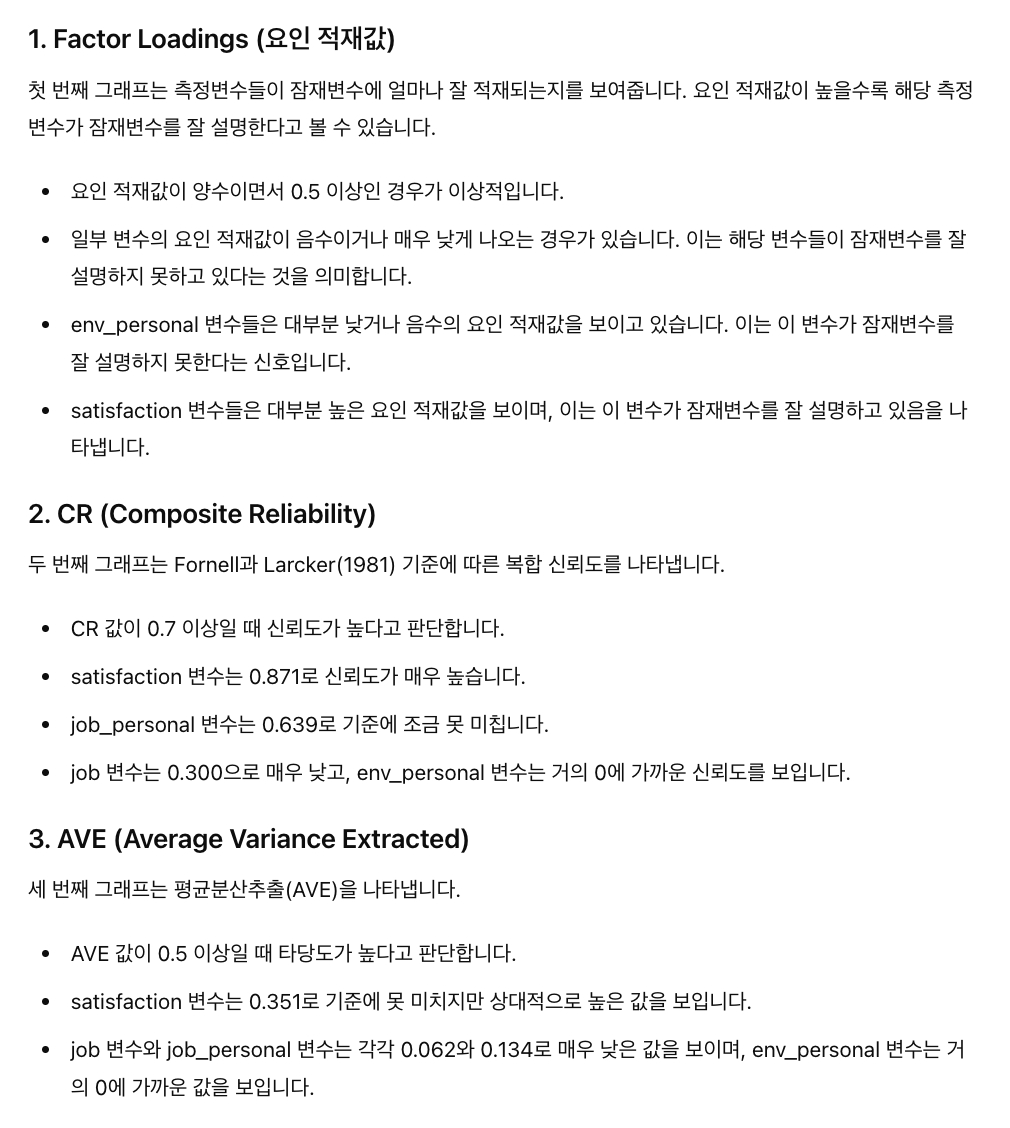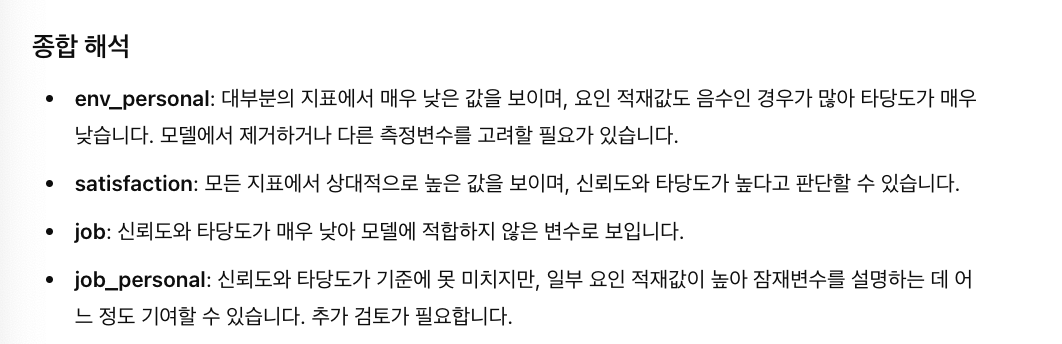

* Env_personal은 이직 여부에 별로 적합하지 않다고 봐야할 듯.,.

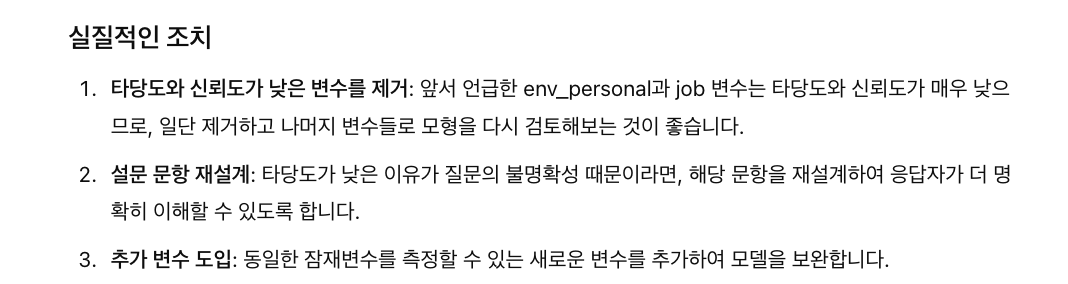

# 6(NEW) 모델링- 구조방정식 (2019년도만)

In [ ]:
# clean_done_df 불러오기
clean_done_df = pd.read_csv('data/clean_done_df.csv', encoding='EUC-KR', low_memory=False)

In [ ]:
# codeuse 불러오기
codeuse = pd.read_csv('data/codeuse_2안.csv', encoding='utf-8', low_memory=False)

In [ ]:
# 2019년 관련 행만 추출
clean_done_df

In [ ]:
clean_done_df.columns

In [ ]:
clean_done_columns = [col.replace('.0', '').replace('_', 'choice').replace('-','minus') for col in clean_done_df.columns]
clean_done_columns

In [ ]:
col_category_df = pd.DataFrame(columns=['이름','카테고리'])

# col_category_df 데이터프레임 생성
col_category_df = pd.DataFrame(columns=['이름', '카테고리'])

clean_done_columns_indpdnt = clean_done_columns[:-2]

for col_name in clean_done_columns_indpdnt:
    org_col_name = col_name[:8]
    category = codeuse['카테고리'][codeuse['이름'] == org_col_name].values[0]  # Series에서 값 추출
    col_category_df.loc[len(col_category_df)] = [col_name, category]  # 새로운 행 추가

In [ ]:
for category, group in col_category_df.groupby('카테고리'):
    print("카테고리:", category)
    print("컬럼:", group['이름'].tolist())

In [ ]:
# 처리된 결과를 담을 문자열 초기화
processed_output = ""

# 결과값 딕셔너리
result_dict = {
    "개인환경": ['g191f020', 'g191f071', 'g191f072', 'g191f010', 'g191h001', 'g191i001', 'g191j001', 'g191m001', 'g191p035', 'g191f073074', 'g191p001choice1', 'g191p001choice3', 'g191p001choice4'],
    "만족도": ['g191d116', 'g191d117', 'g191d119', 'g191d120', 'g191d121', 'g191d122', 'g191d123', 'g191d124', 'g191d125', 'g191d126', 'g191d130', 'g191d131', 'g191d132'],
    "직장": ['g191d016', 'g191d017', 'g191d018', 'g191d041', 'g191d042', 'g191d048', 'g191d049', 'g191d051', 'g191d106', 'g191d152', 'g191d022choice1', 'g191d022choice2', 'g191d022choice3', 'g191d022choice4', 'g191d022choice5', 'g191d022choice6', 'g191d022choice7', 'g191d022choice8', 'g191d020choice1', 'g191d020choice2', 'g191d020choice3', 'g191d020choice4', 'g191d020choice5', 'g191d020choice6', 'g191d020choice7', 'g191d020choice8', 'g191d020choice9', 'g191d020choice10', 'g191d020choice11', 'g191d020choice12', 'g191d020choice13', 'g191d020choice14', 'g191d020choice15', 'g191d020choice16', 'g191d020choice17'],
    "직장개인특성": ['g191d052', 'g191d109', 'g191d108', 'g191d112', 'g191d144', 'g191d145', 'g191d146', 'g191d245', 'g191j021', 'g191k042', 'g191k053', 'g191k055', 'g191k043', 'g191k044', 'g191k045', 'g191k046', 'g191k047', 'g191k048', 'g191k049', 'g191k050', 'g191d249new']
}

# 결과값 처리 및 문자열에 추가
for category, columns in result_dict.items():
    processed_columns = " + ".join(columns)
    processed_output += f"카테고리: {category}\n컬럼: [{processed_columns}]\n"

# 처리된 결과 출력
print(processed_output)


In [ ]:
# 데이터프레임 컬럼명 변경
clean_done_df.columns = clean_done_columns

In [ ]:
missing_values = clean_done_df.columns[clean_done_df.isnull().any()]
missing_values

In [ ]:
clean_done_df.columns[pd.isna(clean_done_df).any()]

In [ ]:
# 수치형이 아닌 값 수치형으로 변환
for col in clean_done_df.columns:
    if clean_done_df[col].dtype == 'object':
        clean_done_df[col] = clean_done_df[col].astype('category').cat.codes
    elif clean_done_df[col].dtype == 'category':
        clean_done_df[col] = clean_done_df[col].cat.codes
    elif clean_done_df[col].dtype == 'bool':
        clean_done_df[col] = clean_done_df[col].astype(int)

# 모든 컬럼이 숫자형인지 확인
# print(clean_done_df.dtypes)

# 연도 컬럼을 제외한 데이터 준비
clean_done_df = clean_done_df.drop('Y191ear', axis=1)

# 모델 정의
model_desc = '''
    # measurement model
    env_personal =~ g191f020 + g191f071 + g191f072 + g191f010 + g191h001 + g191i001 + g191j001 + g191m001 + g191p035 + g191f073074 + g191p001choice1 + g191p001choice3 + g191p001choice4
    satisfaction =~ g191d116 + g191d117 + g191d119 + g191d120 + g191d121 + g191d122 + g191d123 + g191d124 + g191d125 + g191d126 + g191d130 + g191d131 + g191d132
    job =~  g191d016 + g191d017 + g191d018 + g191d041 + g191d042 + g191d048 + g191d049 + g191d051 + g191d106 + g191d152 + g191d022choice1 + g191d022choice2 + g191d022choice3 + g191d022choice4 + g191d022choice5 + g191d022choice6 + g191d022choice7 + g191d022choice8 + g191d020choice1 + g191d020choice2 + g191d020choice3 + g191d020choice4 + g191d020choice5 + g191d020choice6 + g191d020choice7 + g191d020choice8 + g191d020choice9 + g191d020choice10 + g191d020choice11 + g191d020choice12 + g191d020choice13 + g191d020choice14 + g191d020choice15 + g191d020choice16 + g191d020choice17
    job_personal =~ g191d052 + g191d109 + g191d108 + g191d112 + g191d144 + g191d145 + g191d146 + g191d245 + g191j021 + g191k042 + g191k053 + g191k055 + g191k043 + g191k044 + g191k045 + g191k046 + g191k047 + g191k048 + g191k049 + g191k050 + g191d249new

    # structural model
    g191a297 ~ env_personal + satisfaction + job + job_personal
'''

# 모델 적합
model = Model(model_desc)
model.fit(clean_done_df)

# 결과 요약
estimates = model.inspect(std_est=True)
print(estimates)

In [ ]:
estimates.to_csv('data/sem_model_estimates.csv', index=False)

In [ ]:
estimates

## 6-1. 모델링- 구조방정식 시각화

[구조방정식 해석](https://blog.naver.com/gracestock_1/120200806864)

In [ ]:
# indicator vaility
def factorloadings(Esti):
  Est= Esti[Esti['op']=='~'].iloc[3:,:]
  # print(Est)
  Est1 = Est.loc[:,['lval','rval','Est. Std', 'p-value']]
  Est1['sig']= np.where(Est1['Est. Std']> 0.7,"Good",
                        np.where(Est1['Est. Std']> 0.5,"Fair","ns"))
  # print("Fator Loadings Validity \n All Est. Std should be at least 0.5 \n \n", Est1)
  # print(Est[['lval','rval','Est. Std']])
  return Est1

# 지표 타당도
# [출처] 구조방정식(SEM:Structure Equation Modeling) semopy용 CFA function (using python)|작성자 자유자재Paper

def factorloadingPlot(estimates, size=(20,4)):
  plt.figure(figsize=size)
  # data rearrange
  fl = factorloadings(estimates).round(3)
  fplot = sns.barplot(x='lval',y='Est. Std', hue='rval', data=fl)
  # selected variable (unique data)
  vari = factorloadings(estimates)['rval'].unique()
  for i in range(len(vari)) :
    fplot.bar_label(fplot.containers[i])
  plt.hlines(0.7,-1, 13,linestyle="--", colors= "gray")
  plt.title('Factor loadings indices Validity')
  plt.xlabel('item(measurement variable)', color="black")
  plt.ylabel('factor loading value(std)', color="black")
  plt.legend(loc='lower right', title='Latent variabe');


factorloadingPlot(estimates)

In [ ]:
def factorloadings(Esti):
  Est= Esti[Esti['op']=='~'].iloc[3:,:]
  # print(Est)
  Est1 = Est.loc[:,['lval','rval','Est. Std', 'p-value']]
  Est1['sig']= np.where(Est1['Est. Std']> 0.7,"Good",
                        np.where(Est1['Est. Std']> 0.5,"Fair","ns"))
  # print("Fator Loadings Validity \n All Est. Std should be at least 0.5 \n \n", Est1)
  # print(Est[['lval','rval','Est. Std']])
  return Est1

#data rearrange
def data_sel(est, start=0, variable=None):
  est01= est[est['op']=='~'].iloc[start:,:]
  if variable:
    est_sel = est01[est01['rval']== variable]['Est. Std']
  else:
    est_sel = est01["Est. Std"]
  return est_sel
  # print(est_sel)

#Internal reliabiltiy
# Composite Reliability
def CR(fit_data, variable="", printing=False):
  fit_data = fit_data
  lambda_sum = np.sum(fit_data)
  lambda_sum_squared = lambda_sum**2

  x_squared = fit_data**2  #sqaured lanmda
  error_sum = (1 - x_squared).sum() # 1-lambda_sq
  # CR calculation
  cr_result = lambda_sum_squared/(lambda_sum_squared + error_sum)

  if printing:
    # print(fit_data,'\n')
    # print(x_squared,"\n")
    print('CR of {}: {}\n '.format(variable, round(cr_result, 3)))
  return cr_result

def CR_all(raw_data, colname='rval', result={},  printing=False):
  var = factorloadings(raw_data)[colname]
  for rowvalue in var.unique():
    if not result.get(rowvalue):
      result[rowvalue] = {}
    result[rowvalue]["CR"] = CR(data_sel(raw_data, 3, rowvalue))

  cr_all= pd.DataFrame.from_dict(result).T
  cr_all['sig']= np.where(cr_all["CR"]>0.7,"* (> 0.7)","ns")
  if printing:
    print(cr_all)
  return cr_all
# r = AVE_all(Estimates, "rval")
# r1 = CR_all(Estimates)


# Inernal consistency validity
def CRplot(data, size=(8,5)):
    plt.figure(figsize=size)
    plt.style.use('ggplot')
    # aveall = AVE_all(Estimates)
    aveall = data
    # type(aveall)
    x = aveall.index
    fplot= sns.barplot(x=x, y=aveall['CR'])
    fplot.bar_label(fplot.containers[0])
    plt.hlines(0.7,-1, len(x),linestyle="--", colors= "gray")
    plt.title("CR plot:  CR(>0.7): Fornell & Lacker(1981)")
    plt.xlabel('Latent Variable', color="black")
    plt.ylabel('CR value', color="black")


CRplot(CR_all(estimates))

In [ ]:
# one variable AVE calculation.
# Convergent Validity
def AVE(fit_data, variable="", printing=False):
  fit_data = fit_data
  x_squared = fit_data**2
  fit_data_final = x_squared.mean()
  if printing:
    # print(fit_data,'\n')
    # print(x_squared,"\n")
    print('AVE of {}: {}\n '.format(variable, round(fit_data_final, 3)))
  return fit_data_final


def AVE_all(raw_data, colname='rval', result={}, printing=False):
  var = factorloadings(raw_data)[colname]
  for rowvalue in var.unique():
    if not result.get(rowvalue):
      result[rowvalue] = {}
    result[rowvalue]["AVE"] = AVE(data_sel(raw_data, 3, rowvalue))
  ave_all = pd.DataFrame.from_dict(result).T
  ave_all['sig']= np.where(ave_all["AVE"]> 0.5,"* (> 0.5)","ns")
  if printing:
    print(ave_all)
  return ave_all

#AVE result: for
# estimates_factors = factorloadings(Estimates)
# var = estimates_factors["rval"]
# convergent validity
def AVEplot(data, size=(8,5)):
    plt.figure(figsize=size)
    plt.style.use('ggplot')
    # aveall = AVE_all(Estimates)
    aveall = data
    # type(aveall)
    x = aveall.index
    fplot= sns.barplot(x=x, y=aveall['AVE'])
    fplot.bar_label(fplot.containers[0])
    plt.hlines(0.5,-1, len(x),linestyle="--", colors= "gray")
    plt.title("AVE plot: AVE(>0.5): Fornell & Lacker(1981)")
    plt.xlabel('Latent Variable', color="black")
    plt.ylabel('AVE value', color="black")

# AVEplot( AVE_all(Estimates))


In [ ]:
AVE_all(estimates)

In [ ]:
AVEplot( AVE_all(estimates))

In [ ]:
def CR_AVE(raw_data, colname='rval', result={}):
  var = factorloadings(raw_data)[colname]
  for rowvalue in var.unique():
    if not result.get(rowvalue):
      result[rowvalue] = {}
    result[rowvalue]["CR"] = CR(data_sel(raw_data, 3, rowvalue))
    result[rowvalue]["AVE"] = AVE(data_sel(raw_data, 3, rowvalue))

  return pd.DataFrame.from_dict(result).T


CR_AVE(estimates, "rval")

## 6-2. 모델링- 구조방정식 해석

In [ ]:
params = model.inspect()

# 데이터프레임 열 확인
print(params.columns)

# 그래프 초기화
graph = nx.DiGraph()

# 측정 모델 및 구조 모델 추가
for _, row in params.iterrows():
    if row['op'] in ['~', '=~']:
        graph.add_edge(row['rval'], row['lval'], weight=row['Estimate'])

# 그래프 레이아웃 설정
pos = nx.spring_layout(graph, k=0.5, iterations=50)

# 그래프 그리기
plt.figure(figsize=(14, 10))
nx.draw(graph, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20, edge_color='gray')

# 엣지 라벨 추가 (경로 계수)
edge_labels = { (row['rval'], row['lval']): f'{row["Estimate"]:.2f}' for _, row in params.iterrows() if row['op'] in ['~', '=~'] }
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

plt.title('Structural Equation Model')
plt.show()

In [ ]:
params = model.inspect()

# 중요 변수 상위 N개 필터링 (절대값 기준)
important_params = params.loc[params['op'].isin(['~', '=~'])].copy()
important_params['abs_estimate'] = important_params['Estimate'].abs()
top_N_params = important_params.nlargest(20, 'abs_estimate')

# 그래프 초기화
graph = nx.DiGraph()

# 필터된 상위 N개 측정 모델 및 구조 모델 추가
for _, row in top_N_params.iterrows():
    graph.add_edge(row['rval'], row['lval'], weight=row['Estimate'])

# 그래프 레이아웃 설정
pos = nx.spring_layout(graph, k=1, iterations=100)

# 그래프 그리기
plt.figure(figsize=(18, 12))
nx.draw(graph, pos, with_labels=True, node_size=7000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20, edge_color='gray')

# 엣지 라벨 추가 (경로 계수)
edge_labels = { (row['rval'], row['lval']): f'{row["Estimate"]:.2f}' for _, row in top_N_params.iterrows() }
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)

plt.title('Top 20 Important Paths in Structural Equation Model')
plt.show()

In [ ]:
params = model.inspect()

# 중요 변수 상위 20개 필터링 (요인 적재값 기준)
important_params = params.loc[params['op'].isin(['~', '=~'])].copy()
important_params['abs_estimate'] = important_params['Estimate'].abs()
top_20_params = important_params.nlargest(20, 'abs_estimate')

# 그래프 초기화
graph = pydot.Dot(graph_type='digraph', rankdir='LR')

# 노드 추가
nodes = set(top_20_params['rval']).union(set(top_20_params['lval']))
for node in nodes:
    graph.add_node(pydot.Node(node, shape='ellipse' if node.islower() else 'box'))

# 엣지 추가
for _, row in top_20_params.iterrows():
    graph.add_edge(pydot.Edge(row['rval'], row['lval'], label=f'{row["Estimate"]:.2f}'))

# 그래프 출력
graph.write_png('data/sem_model.png')
display(Image(filename='data/sem_model.png'))

* Job:
* g191d017- D6. 첫직장 사업체 종사자 수

* job_personal:
* g191k047- K6. 일자리 지원 시 중요도 6- 업무량
* g191k046- K6. 일자리 지원 시 중요도 5- 업무 내용의 난이도
* g191k044-K6. 일자리 지원 시 중요도 3- 자신의 적성, 흥미
* g191k048-K6. 일자리 지원 시 중요도 7- 개인 발전 가능성
* g191k042-K6. 일자리 지원 시 중요도 1- 근로소득
* g191k055-K6. 일자리 지원 시 중요도 14- 출퇴근 거리
* g191k045-K6. 일자리 지원 시 중요도 4- 전공 분야와의 관련성
* g191k044-K6. 일자리 지원 시 중요도 3- 자신의 적성, 흥미
* g191k050-K6. 일자리 지원 시 중요도 9- 직장(고용)안정성
* g191k053-K6. 일자리 지원 시 중요도 12- 회사규모
* g191k049-K6. 일자리 지원 시 중요도 8- 직업 자체의 미래 전망
* g191k043-K6. 일자리 지원 시 중요도 2- 근로시간

* env_personal:
* g191p035- P11. 현재 부모님의 월평균 소득
* g191f072- F14. 졸업대학 관련 만족도 9- 학교에 대한 전반적인 만족 수
* g191j001- J1. 졸업 전 취업 목표의 유무
* g191f071- F14. 졸업대학 관련 만족도 8- 전공에 대한 전반적인 만족 수

* satisfaction:
* g191d121- D31. <취업자 공통> 첫 직장(일자리) 만족도 6- 개인의 발전 가능성
* g191d130- D31-1. <취업자 공통> 첫 직장(일자리)에 대한 전반적인 만족
* g191d119- D31. <취업자 공통> 첫 직장(일자리) 만족도 4- 근무 환경(시설, 안전, 위생상태 등)

In [ ]:
important_params = estimates.loc[estimates['op'].isin(['~', '=~'])].copy()
important_params['abs_estimate'] = important_params['Estimate'].abs()
top_20_params = important_params.nlargest(20, 'abs_estimate')

# 잠재 변수 간 경로 필터링
latent_paths = estimates.loc[(estimates['op'] == '~') &
                             (estimates['lval'].isin(['env_personal', 'satisfaction', 'job', 'job_personal'])) &
                             (estimates['rval'].isin(['env_personal', 'satisfaction', 'job', 'job_personal']))]

# 노드 설정
latent_vars = {'env_personal', 'satisfaction', 'job', 'job_personal'}
observed_vars = set(top_20_params['rval']).union(set(top_20_params['lval'])) - latent_vars

# 그래프 초기화
graph = pydot.Dot(graph_type='digraph', rankdir='TB')

# 노드 추가
for node in latent_vars:
    graph.add_node(pydot.Node(node, shape='ellipse', style='filled', fillcolor='lightgrey', fontsize="16", fontname="Arial"))

for node in observed_vars:
    graph.add_node(pydot.Node(node, shape='box', fontsize="12", fontname="Arial"))

# 엣지 추가 (중요 경로 상위 20개)
for _, row in top_20_params.iterrows():
    graph.add_edge(pydot.Edge(row['rval'], row['lval'], label=f'{row["Estimate"]:.2f}', style='solid', fontsize="12", fontname="Arial"))

# 엣지 추가 (잠재 변수 간 경로)
for _, row in latent_paths.iterrows():
    graph.add_edge(pydot.Edge(row['rval'], row['lval'], label=f'{row["Estimate"]:.2f}', color='red', style='solid', fontsize="12", fontname="Arial"))


# 그래프 출력
graph.write_png('data/sem_model_with_elements.png')
display(Image(filename='data/sem_model_with_elements.png'))